In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./train.csv',encoding='utf-8')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

In [5]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

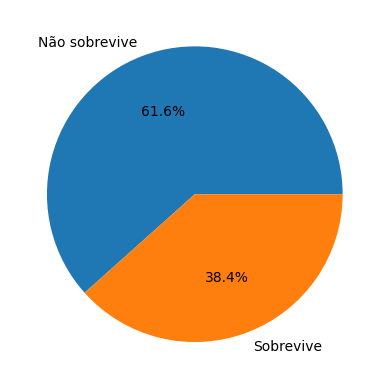

<Figure size 1000x600 with 0 Axes>

In [6]:
plt.pie(df['Survived'].value_counts(),labels=['Não sobrevive','Sobrevive'],autopct='%1.1f%%')
plt.figure(figsize=(10,6))

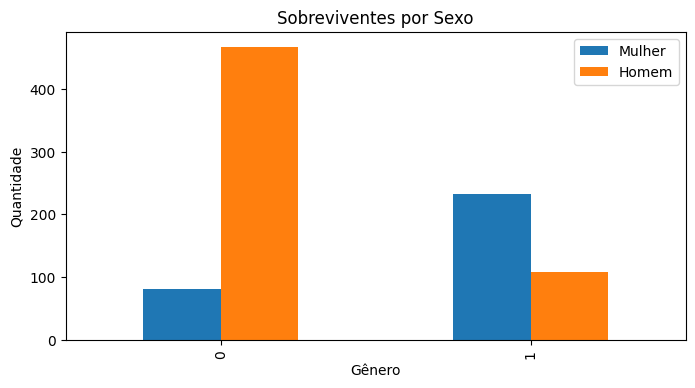

In [7]:
pd.crosstab(df.Survived,df.Sex).plot(kind='bar',figsize=(8,4))
plt.title('Sobreviventes por Sexo')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(['Mulher','Homem'])

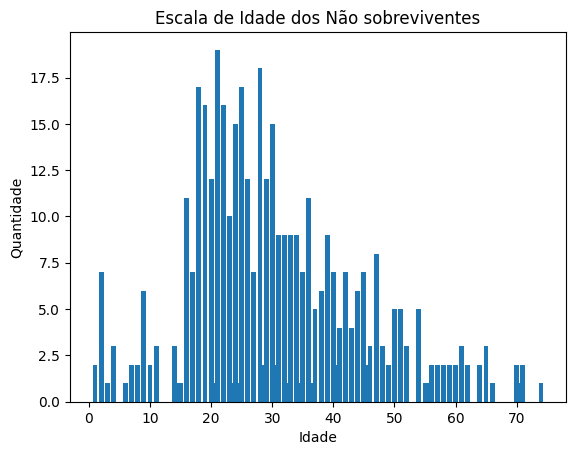

In [8]:
idade_naosobreviventes = df['Age'][df['Survived'] == 0]
idade_naosobreviventes = idade_naosobreviventes.dropna()
contagem_idades = idade_naosobreviventes.value_counts().sort_index()

plt.bar(contagem_idades.index, contagem_idades.values)

plt.title("Escala de Idade dos Não sobreviventes")
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()


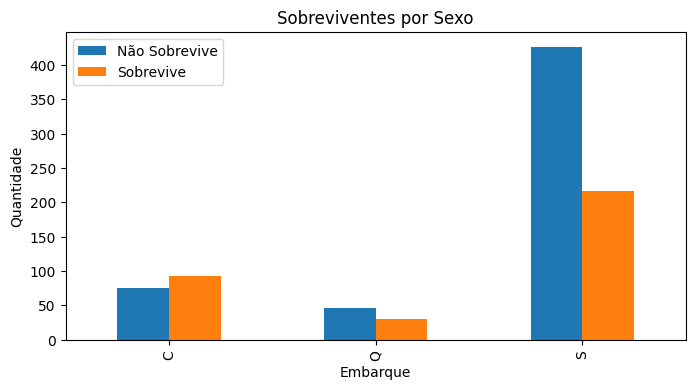

In [9]:

pd.crosstab(df['Embarked'],df['Survived']).plot(kind='bar',figsize=(8,4))
plt.title('Sobreviventes por Sexo')
plt.xlabel('Embarque')
plt.ylabel('Quantidade')
plt.legend(['Não Sobrevive','Sobrevive'])

<Figure size 1000x600 with 0 Axes>

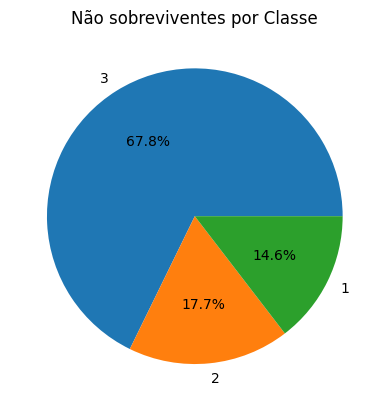

<Figure size 1000x600 with 0 Axes>

In [10]:
plt.pie(df['Pclass'][df['Survived'] == 0].value_counts(),labels=df['Pclass'][df['Survived'] == 0].value_counts().index,autopct='%1.1f%%')

plt.title("Não sobreviventes por Classe")
plt.figure(figsize=(10,6))


Text(0.5, 1.0, 'Matriz de Correlação')

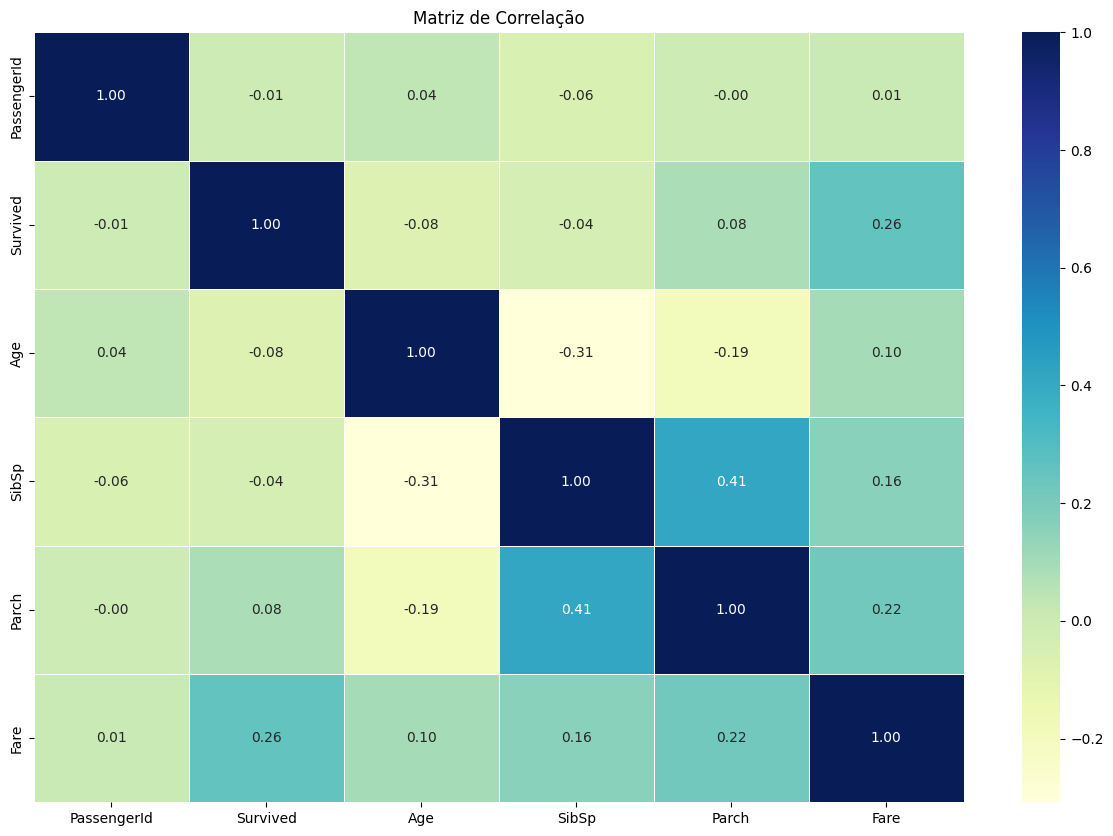

In [11]:
import seaborn as sns


corr_matrix = df.drop(['Name','Sex','Ticket','Cabin','Pclass','Embarked'],axis=1).corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')
plt.title('Matriz de Correlação')

## Modelagem dos dados

In [12]:
df_dummy = pd.get_dummies(df.drop('Name',axis=1),columns=['Sex','Ticket','Cabin','Pclass','Embarked']).dropna()

In [13]:
X = df_dummy.drop('Survived',axis=1)
y = df_dummy['Survived']

### Treino e Teste

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
#imports modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
models = { 'KNN': KNeighborsClassifier(),'Logistic Regressition': LogisticRegression(),'Random Forest':RandomForestClassifier()}

In [17]:
def fit_and_score(models,X_train,X_test,y_train,y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [18]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

d:\EstudoDS\kaggle\titanic\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5664335664335665,
 'Logistic Regressition': 0.7622377622377622,
 'Random Forest': 0.7902097902097902}

### Ajuste de hiperparâmetros e validação cruzada


In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score


def crossValidation(models, X, y, cv=5):
    
    for name, model in models.items():
        print(f"\n🔍 Avaliando modelo: {name}")
        train_score = []
        scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
        print(f"✅ Score médio de {name}: {np.mean(scores)*100:.2f}%")
        # Bar plot
        plt.figure(figsize=(6, 4))
        plt.bar(['Cross-val score'], [np.mean(scores)], color='lightgreen')
        plt.ylim(0, 1)
        plt.title(f"Score médio - {name}")
        plt.ylabel("Score")
        plt.grid(True, axis='y')
        plt.show()
        


🔍 Avaliando modelo: KNN
✅ Score médio de KNN: 64.62%


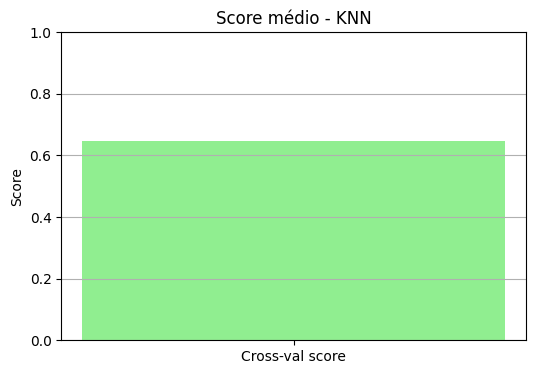


🔍 Avaliando modelo: Logistic Regressition
✅ Score médio de Logistic Regressition: 79.16%


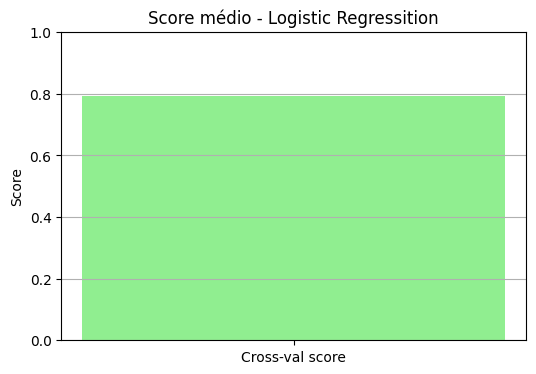


🔍 Avaliando modelo: Random Forest
✅ Score médio de Random Forest: 81.61%


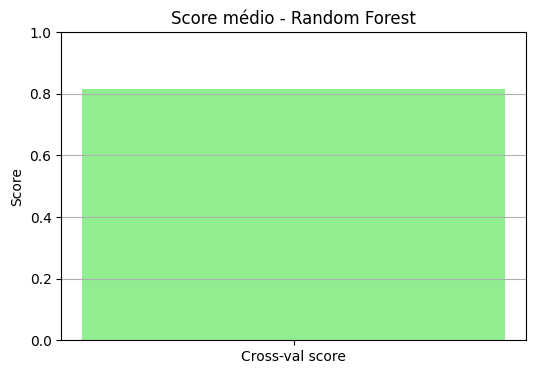

In [27]:
crossValidation(models, X=X_train, y=y_train)

In [21]:
# LogisticRegression hiperparâmetros
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hiperparâmetros
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=10,
                                n_iter=20,
                                verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.score(X_test, y_test)


0.8041958041958042

In [31]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': np.float64(29.763514416313132)}

In [32]:
# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=10,
                           n_iter=20,
                           verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_
rs_rf.score(X_test, y_test)


0.7832167832167832

### Avaliando um modelo de classificação


In [35]:
y_preds = rs_log_reg.predict(X_test)

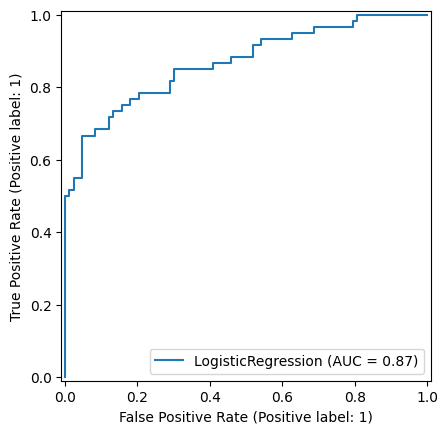

In [39]:
from sklearn.metrics import RocCurveDisplay

model = rs_log_reg.best_estimator_

# Plota a curva ROC com os dados de teste
RocCurveDisplay.from_estimator(model, X_test, y_test)

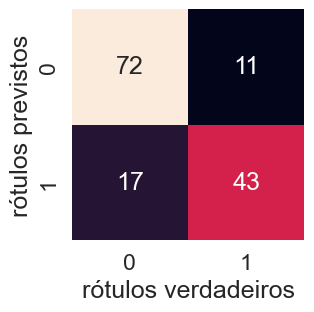

In [41]:
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("rótulos verdadeiros")
    plt.ylabel("rótulos previstos")

plot_conf_mat(y_test, y_preds)

## Relatório de classificação


In [42]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        83
           1       0.80      0.72      0.75        60

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.80      0.80      0.80       143

